<a href="https://colab.research.google.com/github/asau12/asau_Advancemachinelearning/blob/main/Assignment_1/Assignment_1_IMDB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt

from keras import models
from keras import layers

In [5]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
#mapping words to an integer index
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Data Preparation

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

# **Assignment questions**
## 1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [10]:
#Building model with 2, 3 and 4 Layers

model_2L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_4L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [11]:
#Compiling the models

model_2L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_3L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_4L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
#Creating validation set from the original training sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
#Training the models
history_2L = model_2L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_3L = model_3L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_4L = model_4L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5018 - accuracy: 0.7881 - val_loss: 0.3889 - val_accuracy: 0.8673
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3160 - accuracy: 0.9023 - val_loss: 0.3226 - val_accuracy: 0.8820
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2433 - accuracy: 0.9253 - val_loss: 0.3408 - val_accuracy: 0.8557
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2023 - accuracy: 0.9359 - val_loss: 0.2792 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1692 - accuracy: 0.9507 - val_loss: 0.2949 - val_accuracy: 0.8792
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1480 - accuracy: 0.9556 - val_loss: 0.2776 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1273 - accuracy: 0.9649 - val_loss: 0.2883 - val_accuracy: 0.8864
Epoch 8/20
30

In [14]:
model_2L.summary()
model_3L.summary()
model_4L.summary()

#Tells us about the training loss and accuracy as well as validation loss and accuracy of the three models
history_dict2L = history_2L.history
history_dict3L = history_3L.history
history_dict4L = history_4L.history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Traina

No handles with labels found to put in legend.


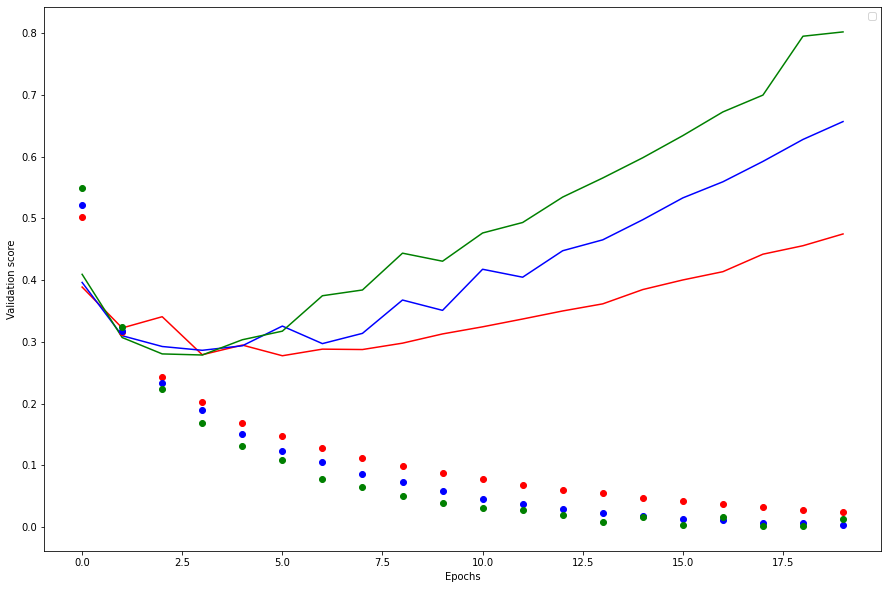

In [15]:
# Plotting the training and validation loss
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(history_dict2L['val_loss'], 'r', history_dict3L['val_loss'], 'b',history_dict4L['val_loss'], 'g')
plt.plot(history_dict2L['loss'], 'r', history_dict3L['loss'], 'b',history_dict4L['loss'], 'g', marker='o', linestyle='none')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()


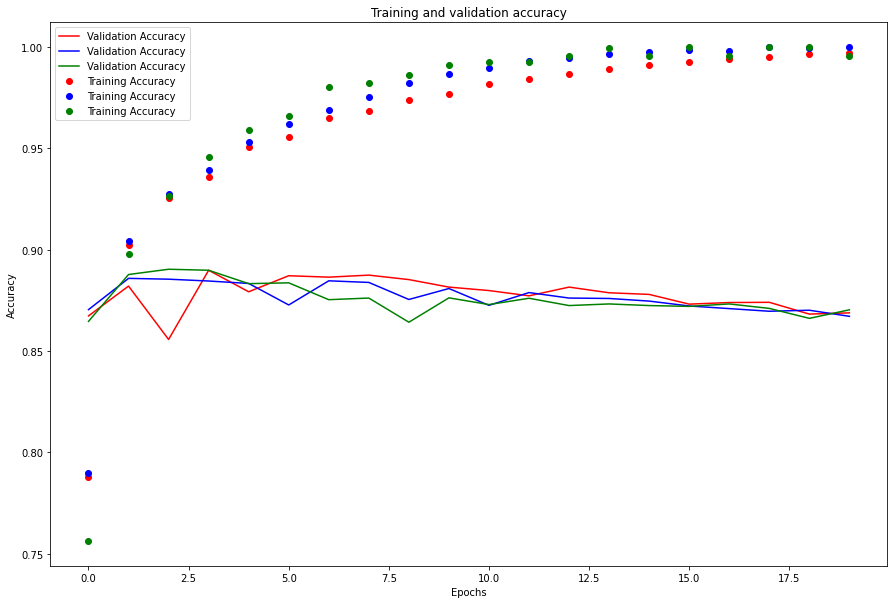

In [16]:
# Plotting the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

 
plt.plot(history_dict2L['val_accuracy'], 'r', history_dict3L['val_accuracy'], 'b',history_dict4L['val_accuracy'], 'g',  label="Validation Accuracy")
plt.plot(history_dict2L['accuracy'], 'r', history_dict3L['accuracy'], 'b',history_dict4L['accuracy'], 'g', marker='o', linestyle='none', label="Training Accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation and Answer - The number of hidden layers is reduced it has a direct impact on the accuracy of the network as with the complex problem having less number of hidden layers it might be possible that network will not be trained properly. On the other hand when the number of hidden layers cross the optimal number of hidden layers (three layers), time complexity increases in orders of magnitude as compared to the accuracy gain.The techniques implementing less than three number of hidden layers mostly had a loss in accuracy while the architecture implementing more than three numbers of hidden layers were found not to be optimal in terms of time complexity. 

### 2.Try using. layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on

In [17]:
model_3LH = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3LH.compile(optimizer="rmsprop",loss="binary_crossentropy",
              metrics=["accuracy"])

history_3LH = model_3LH.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.4928 - accuracy: 0.7689 - val_loss: 0.3869 - val_accuracy: 0.8352
Epoch 2/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2628 - accuracy: 0.9025 - val_loss: 0.3177 - val_accuracy: 0.8672
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1941 - accuracy: 0.9289 - val_loss: 0.2782 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1422 - accuracy: 0.9497 - val_loss: 0.3087 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1123 - accuracy: 0.9615 - val_loss: 0.3444 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0834 - accuracy: 0.9735 - val_loss: 0.3349 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.3714 - val_accuracy: 0.8822
Epoch 8/20
30

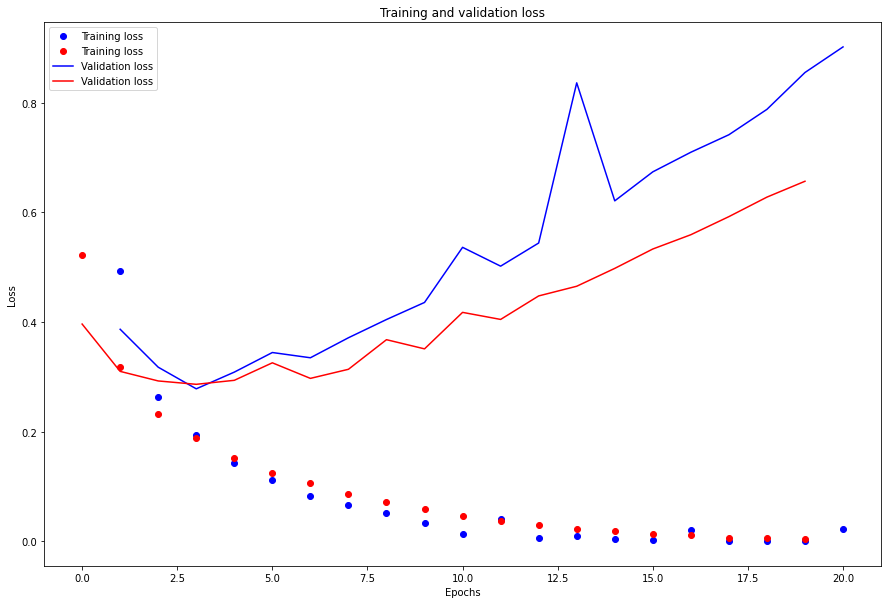

In [18]:
history_dict_3LH = history_3LH.history

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

#loss_values = history_dict_3LH["loss"]
#val_loss_values = history_dict_3LH["val_loss"]
epochs = range(1, len(history_dict_3LH["loss"]) + 1)
plt.plot(epochs, history_dict_3LH["loss"], "bo",  history_dict3L['loss'], 'ro' , label="Training loss")
plt.plot(epochs, history_dict_3LH["val_loss"], "b", history_dict3L['val_loss'], 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


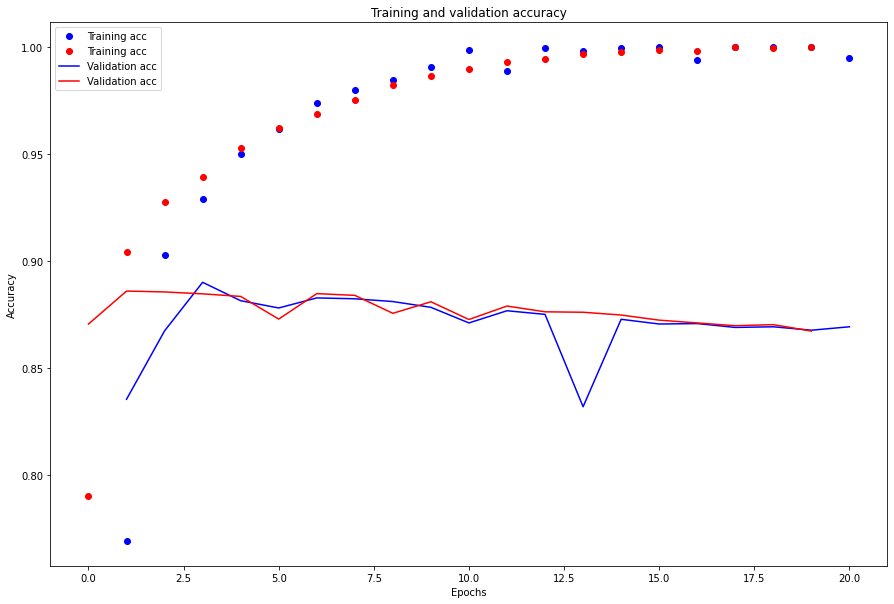

In [19]:
#This pot shows comparision of two three layers models with different number of nodes.

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()
#acc = history_dict_3LH["accuracy"]
#val_acc = history_dict_3LH["val_accuracy"]
plt.plot(epochs,history_dict_3LH["accuracy"], "bo",history_dict3L['accuracy'], 'ro', label="Training acc")
plt.plot(epochs, history_dict_3LH["val_accuracy"], "b",history_dict3L['val_accuracy'], 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 3. Try using the 'mse' loss function instead of 'binary_crossentropy'.

In [20]:
model_3LM = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3LM.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Training your model
history_3LM = model_3LM.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_3LM = history_3LM.history


Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1780 - accuracy: 0.7813 - val_loss: 0.1262 - val_accuracy: 0.8691
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0967 - accuracy: 0.9040 - val_loss: 0.0976 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0695 - accuracy: 0.9264 - val_loss: 0.0873 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0543 - accuracy: 0.9407 - val_loss: 0.0898 - val_accuracy: 0.8808
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0439 - accuracy: 0.9549 - val_loss: 0.0849 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0350 - accuracy: 0.9662 - val_loss: 0.0916 - val_accuracy: 0.8751
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0298 - accuracy: 0.9721 - val_loss: 0.0850 - val_accuracy: 0.8843
Epoch 8/20
30

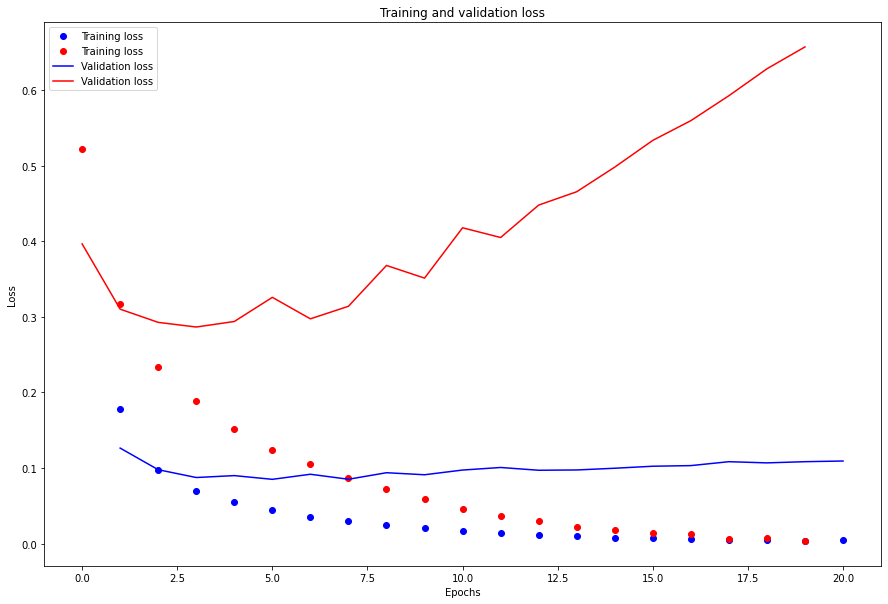

In [21]:
#Plotting the training and validation loss for two model with different loss function

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

epochs = range(1, len(history_dict_3LM["loss"]) + 1)
plt.plot(epochs, history_dict_3LM["loss"], "bo",history_dict3L['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_3LM["val_loss"], "b",history_dict3L['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<Figure size 432x288 with 0 Axes>

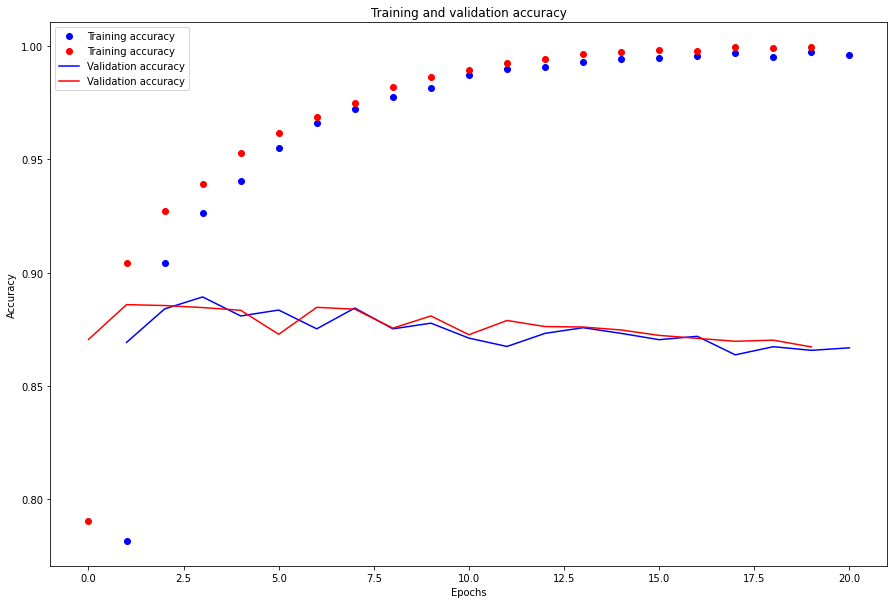

In [22]:
# Plotting the training and validation accuracy for two model with different loss function
plt.clf()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(epochs,history_dict_3LM["accuracy"], "bo", history_dict3L['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict_3LM["val_accuracy"], "b", history_dict3L['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

###4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

In [23]:
model_t = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_t.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_t = model_t.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1622 - accuracy: 0.7933 - val_loss: 0.1163 - val_accuracy: 0.8670
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0838 - accuracy: 0.9078 - val_loss: 0.0909 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0569 - accuracy: 0.9351 - val_loss: 0.1025 - val_accuracy: 0.8582
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0413 - accuracy: 0.9539 - val_loss: 0.0841 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0329 - accuracy: 0.9626 - val_loss: 0.0870 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0233 - accuracy: 0.9750 - val_loss: 0.0917 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0197 - accuracy: 0.9789 - val_loss: 0.0996 - val_accuracy: 0.8743
Epoch 8/20
30

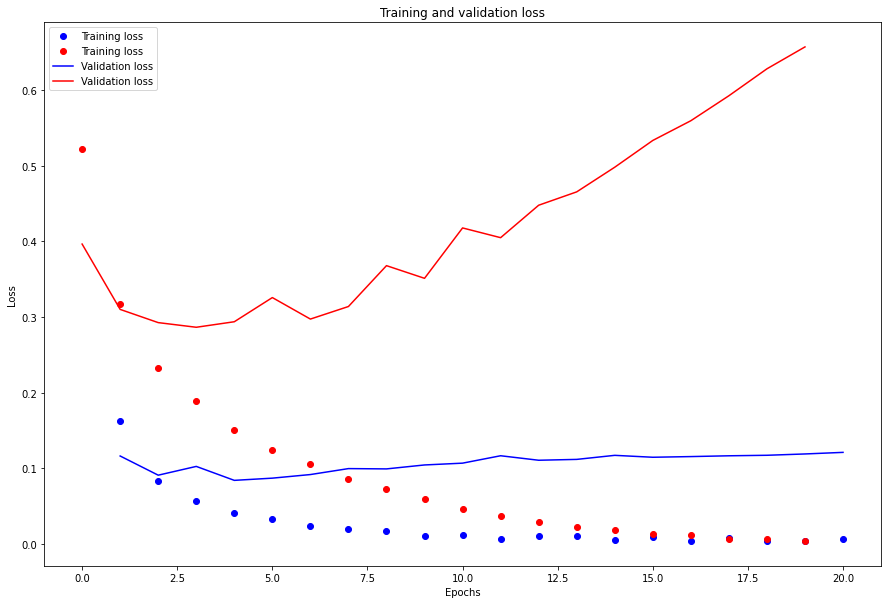

In [24]:
history_dict_t = history_t.history
#loss_values = history_dict_t["loss"]
#val_loss_values = history_dict_t["val_loss"]
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

epochs = range(1, len(history_dict_t["loss"]) + 1)
plt.plot(epochs, history_dict_t["loss"], "bo",history_dict3L['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_t["val_loss"], "b",history_dict3L['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

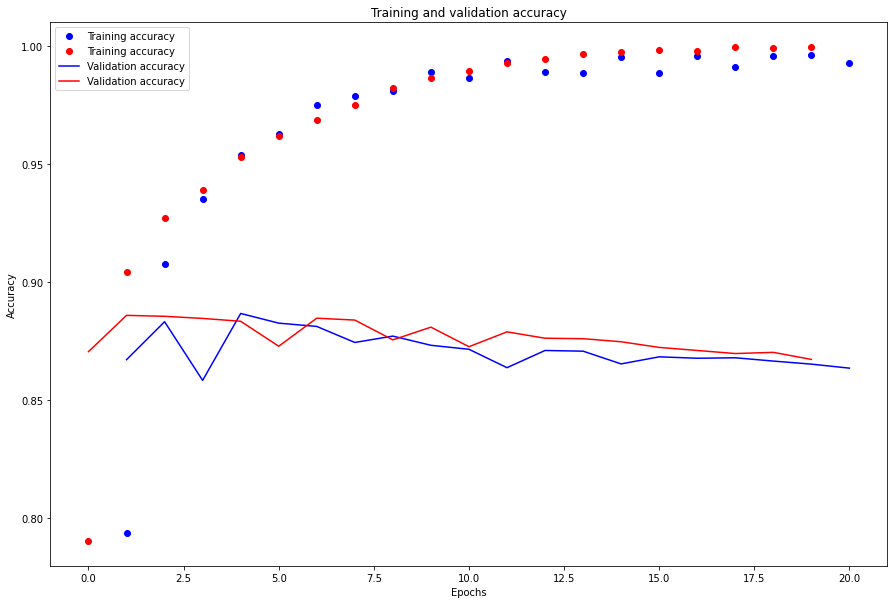

In [25]:
# Plotting the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()
plt.plot(epochs,history_dict_t["accuracy"], "bo", history_dict3L['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict_t["val_accuracy"], "b", history_dict3L['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [26]:
model_5 = keras.Sequential([
    #layers.Dropout(0.2),                        
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
# Compiling the model

model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [28]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5302 - accuracy: 0.7633 - val_loss: 0.3958 - val_accuracy: 0.8512
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3242 - accuracy: 0.8901 - val_loss: 0.3006 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2483 - accuracy: 0.9127 - val_loss: 0.3057 - val_accuracy: 0.8771
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1941 - accuracy: 0.9365 - val_loss: 0.2722 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1593 - accuracy: 0.9458 - val_loss: 0.2816 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1314 - accuracy: 0.9548 - val_loss: 0.2919 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1058 - accuracy: 0.9657 - val_loss: 0.3113 - val_accuracy: 0.8854
Epoch 8/20
30

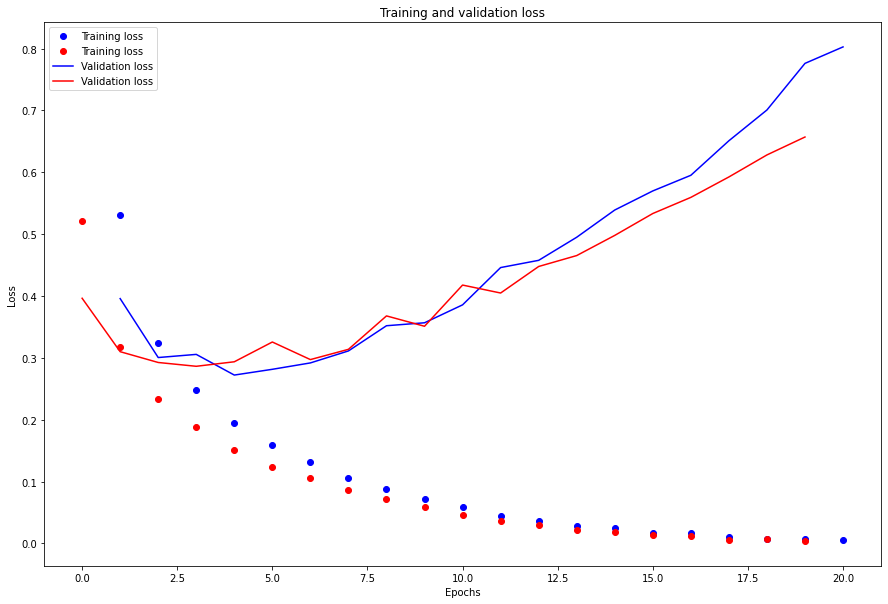

In [30]:
history_dict_5 = history_5.history

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

loss_values = history_dict_5["loss"]
val_loss_values = history_dict_5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, history_dict_5["loss"], "bo",history_dict3L['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_5["val_loss"], "b",history_dict3L['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

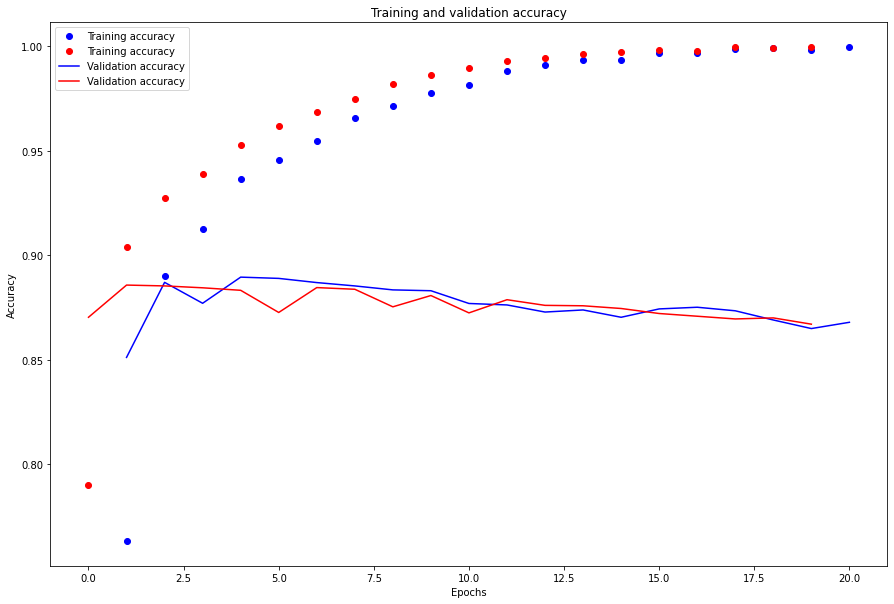

In [35]:
# Plotting the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()

plt.plot(epochs,history_dict_5["accuracy"], "bo", history_dict3L['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict_5["val_accuracy"], "b", history_dict3L['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()